### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [2]:
#1
url = 'https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv'
df = pd.read_csv(url)
df.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()
#conclusion
#Data ini menunjukkan data apa saja yang ada, check value apakah ada null atau tidak, dan data typenya apa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
race_counts = df['race'].value_counts(dropna=False)

# Display the counts
print("Race counts:\n", race_counts)

Race counts:
 race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


In [5]:
#3b
admission_counts = df['admission'].value_counts(dropna=False)
print("\nAdmission counts:\n", admission_counts)


Admission counts:
 admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
# Fill NaN values in 'admission' column to "deny"
df['admission'].fillna('deny', inplace=True)

# Fill NaN values in 'race' column to "other"
df['race'].fillna('other', inplace=True)

# Display the updated 'race' and 'admission' columns to confirm the changes
df[['race', 'admission']].head()


<ipython-input-6-5b4008d136b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-6-5b4008d136b9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,race,admission
0,Asian,Admit
1,Black,deny
2,other,Admit
3,Black,deny
4,Hispanic,deny


5. recheck missing value

In [7]:
#5
miss_values = df.isnull().sum()
print(miss_values)


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


6. drop application_id column

In [8]:
# 6
df.drop('application_id', axis=1, inplace=True)
df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,Female,True,3.30,Business,other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny


7. show describe column and conclude what the insight is from that column

In [9]:
#7
df.describe()

#conclusion
# Dari coloumn ini kita dapat mengetahui nilai maksimal dan min dari jumlah data yang ada seperti gpa, gmat, dan work_exp

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

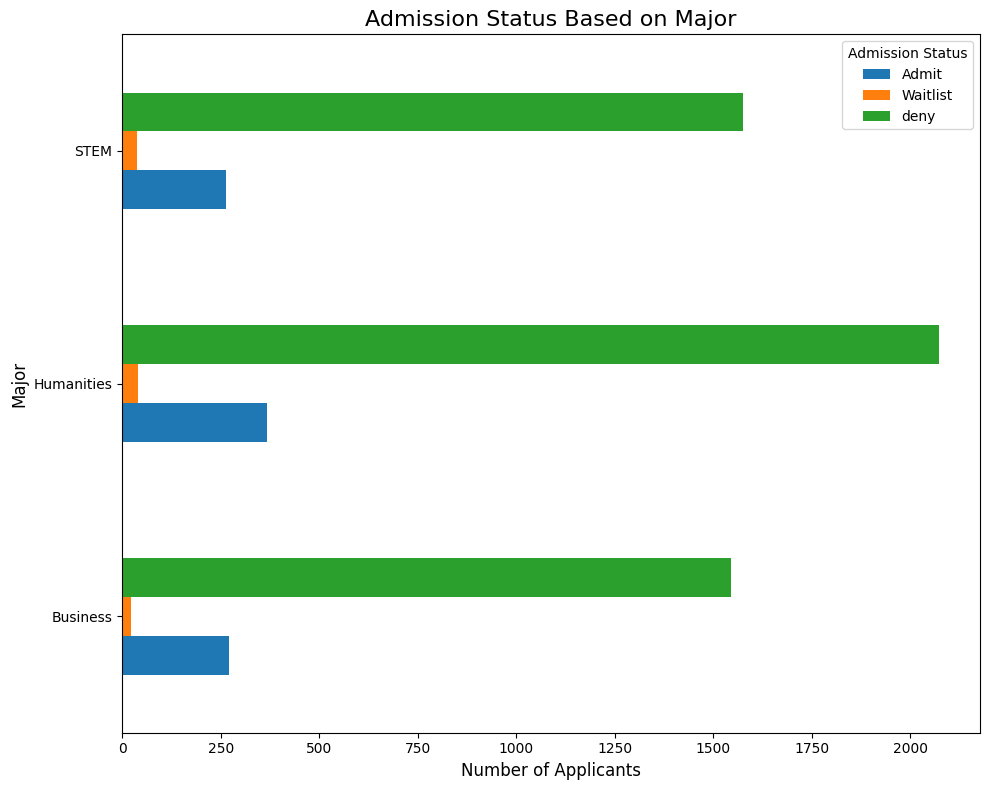

In [10]:
#8
admission_data = df.dropna(subset=['admission'])
admission_by_major = pd.crosstab(admission_data['major'], admission_data['admission'])
admission_by_major.plot(kind='barh', stacked=False, figsize=(10, 8))

plt.title('Admission Status Based on Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Admission Status')

plt.tight_layout()
plt.show()

# Dari visualisasai bar di atas, dapat kita lihat jumlah orang yang apply kerja
# dari berbagai lulusan. Kita dapat melihat orang yang admit/diterima, waitting list, dan ditolak.
# Kita dapat menyimpulkan dan membandingkan berapa banyak orang yang diterima, ditolak, dan waitting list dari 3 jurusan yang ada.
# Jumlah orang yang ditolak terbanyak dari lulusan humanities, dan diterima terbanyak juga dari humanities.
# Dengan adanya visualisasi bar horizontal ini data dapat terlihat lebih simple dan mudah dipahami.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

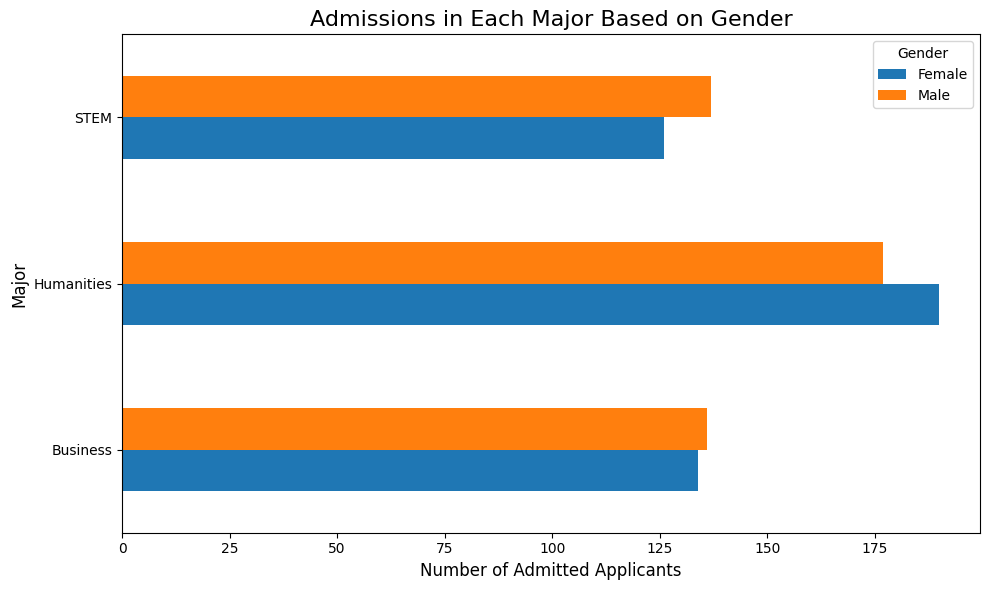

In [11]:
#9
# Drop rows with missing admission data
admission_data = df.dropna(subset=['admission'])

# Filter data where admission is 'Admit'
admitted_data = admission_data[admission_data['admission'] == 'Admit']

# Create a crosstab to count admissions by 'major' and 'gender'
admission_by_major_gender = pd.crosstab(admitted_data['major'], admitted_data['gender'])

# Check if crosstab is empty
if admission_by_major_gender.empty:
    print("The crosstab is empty. Check your data for admissions.")
else:
    # Plot the horizontal bar chart
    admission_by_major_gender.plot(kind='barh', stacked=False, figsize=(10, 6))

    # Set title and labels
    plt.title('Admissions in Each Major Based on Gender', fontsize=16)
    plt.xlabel('Number of Admitted Applicants', fontsize=12)
    plt.ylabel('Major', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Gender')

    # Show the plot
    plt.tight_layout()
    plt.show()
# Dari visualisasi ini kita dapat menyimpulkan lebih banyak peng-apply pria atau wanita yang diterima
# dari setiap jurusan yang ada. Kita dapat melihat jumlah pria terbanyak yang diterima dari lulusan Humanities,
# dan wanita terbanyak dari lulusan Humanities juga.

10. create your own insightful visualization and explain it in at least 2 sentences

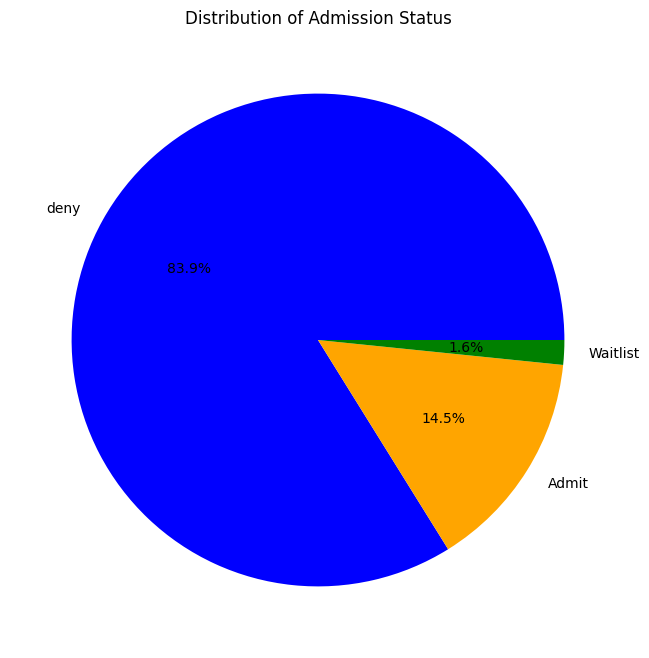

In [12]:
#10
import matplotlib.pyplot as plt

admission_counts = df['admission'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])

plt.title('Distribution of Admission Status')

plt.show()
# Dari data visualisasi pie chart ini, kita dapat melihat berapa presentase orang yang diterima, ditolak, dan waitting list.
# Di sini bisa kita lihat dari 100% seluruh applicants, jumlah yang diterima hanya 14,5%, waitting list 1.6%, dan ditolak sangat banyak yaitu 83,9%
# Dengan pie chart kita langsung dapat melihat dari 1 lingkaran atau 100% applicant kira-kira rasionya berapa dari seluruh admission satatusnya.

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


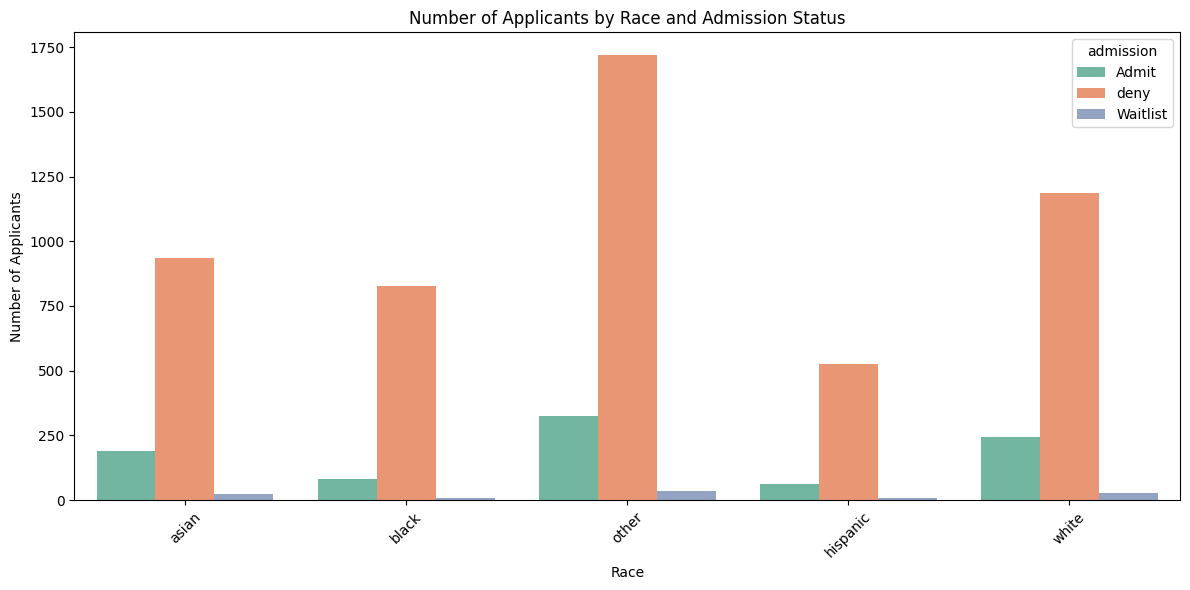

In [13]:
#11
import seaborn as sns
import matplotlib.pyplot as plt

# Karena terdapat 2 other satunya uppercase, untuk menggabungkan seluruh visualisasi saya jadikan seluruh nilai dari race menjadi lowercase sehingga other dapat tergabung
df['race'] = df['race'].str.lower()
plt.figure(figsize=(12, 6))

sns.countplot(x='race', hue='admission', data=df, palette='Set2')

plt.xlabel('Race')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Race and Admission Status')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Dari data visualisasi ini, kita dapat melihat perbandingan jumlah ras apa saja yang mendaftar
# Selain jumlah applicants dari berbagai ras, kita juga dapat melihat berapa banyak orang yang admit, deny, dan waitting list dari setiap ras.
# Penggunaan bar chart ini tentunya sangat membantu memudahkan kita mengumpulkan informasi karena mencakup 3 hal sekaligus yaitu ras apa saja, jumlah applicants setiap ras, dan admission dari setiap ras.

12. encode categorical columns and display the results

In [14]:
from os import X_OK
#12a
from sklearn.preprocessing import LabelEncoder

#encode X

X = df.drop('admission', axis=1)

columns = ['gender', 'international', 'major', 'race', 'work_industry']

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = LabelEncoder().fit_transform(X[col])
    label_encoders[col] = le

df[columns] = X[columns]

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [15]:
#12b
#encode y
df['admission'] = LabelEncoder().fit_transform(df['admission'])
y = df['admission']

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

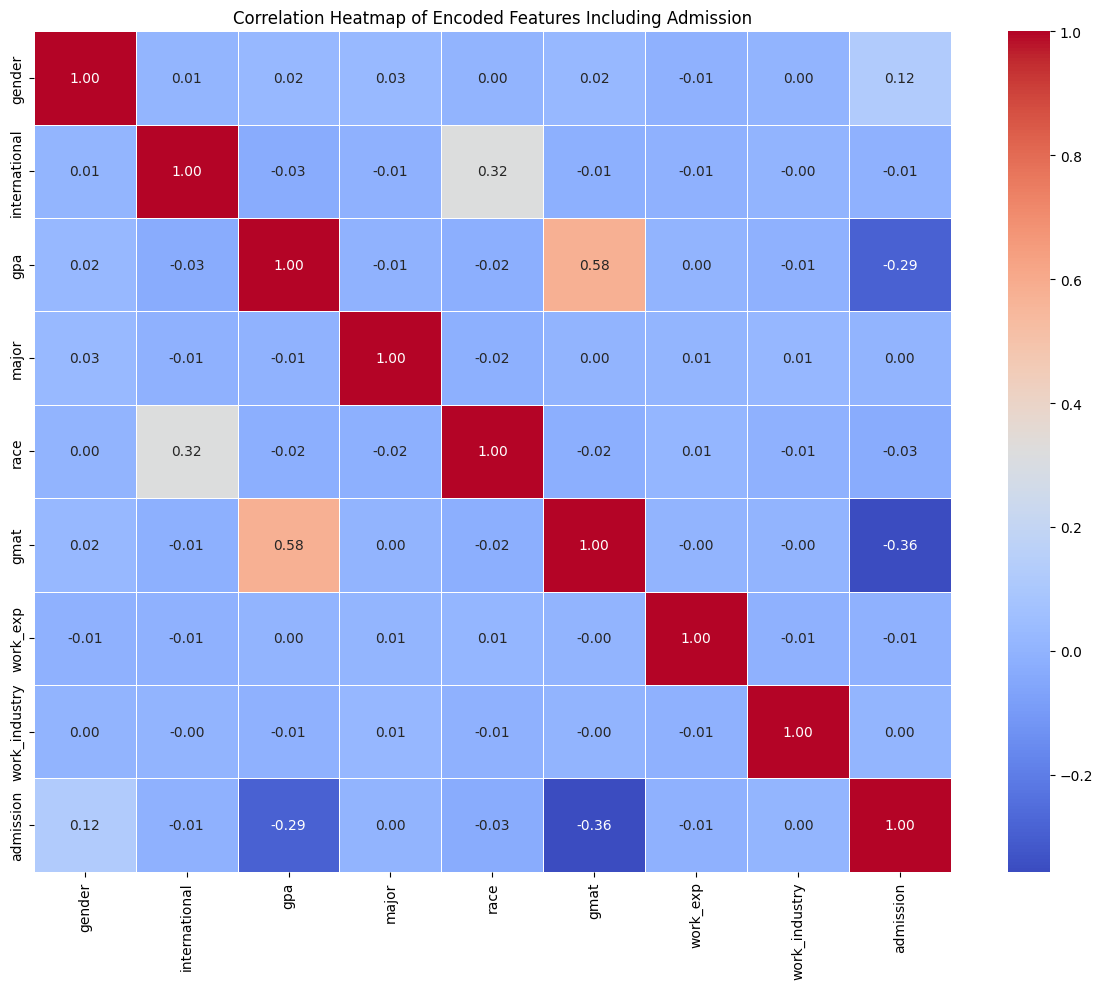

In [16]:
#13
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Include 'admission' in the features DataFrame
X['admission'] = y  # Add the 'admission' column to the features DataFrame

# Step 2: Calculate the correlation matrix for the features including 'admission'
corr_matrix = X.corr()

# Step 3: Plot the heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and display the heatmap
plt.title('Correlation Heatmap of Encoded Features Including Admission')
plt.tight_layout()
plt.show()


#Conclusion
# Heatmap ini menunjukkan bahwa gender, race, dan major dapat mempengaruhi keputusan penerimaan, dan fitur dengan korelasi (positif atau negatif) kuat dapat dipertimbangkan untuk analisis.
# Gender & Admission: Jika ada korelasi positif antara gender dan admission, itu bisa menunjukkan bahwa jenis kelamin memiliki pengaruh terhadap penerimaan.
# Race & Admission: Korelasi antara race dan admission mungkin menunjukkan bahwa ras memiliki pengaruh pada hasil penerimaan.
# Major & Admission: Jika kolom major menunjukkan korelasi negatif dengan admission, itu mungkin menunjukkan bahwa beberapa major memiliki tingkat penerimaan yang lebih rendah.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [17]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
average_gpa = df['gpa'].mean()

# Prepare Lisa's data
lisa_data = {
    'gender': 0,  # Assuming Lisa is female
    'international': 0,  # Local student
    'gpa': average_gpa,  # Average GPA
    'major': 0,  # Entrepreneurship
    'race': 0,  # Asian
    'gmat': 580.0,
    'work_exp': 2,  # 2018 to 2020
    'work_industry': 3
}

X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp','work_industry']]
y = df['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prepare Lisa's data for prediction
lisa_df = pd.DataFrame([lisa_data])

# Predict acceptance for Lisa
prediction = model.predict(lisa_df)

# Output prediction
result = "Accepted" if prediction[0] == 1 else "Rejected"
print(f"Prediction for Lisa: {result}")


Accuracy: 0.7853107344632768
Prediction for Lisa: Rejected
